# Calculating CpG ratio for C. virginica

This workflow calculates CpG ratio, or CpG O/E, CpG ratio is an estimate of germline DNA methylation.



In [1]:
cd analyses/cpg/

/Users/sr320/Documents/GitHub/nb-2018/C_virginica/analyses/cpg


In [39]:
pwd

'/Users/sr320/Documents/GitHub/nb-2018/C_virginica/analyses/cpg'

In [4]:
#fasta file
!head -2 rna.fa
!echo 
!echo number of seqs =
!fgrep -c ">" rna.fa

>ref|XR_002636969.1| PREDICTED: Crassostrea virginica uncharacterized LOC111116054 (LOC111116054), ncRNA
TGATATTGTTGTGTGCAGAACGTGGGTCATGCTGTCTTGTTGAAGAATACCCTCAATCCAAGGCTAGATT

number of seqs =
66625


In [18]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
rna.fa | cut -f1,3 > fasta2tab


Converted 66625 FASTA records in 2660294 lines to tabular format
Total sequence length: 179268149



In [19]:
#Checking header on new tabular format file
!head -2 fasta2tab

ref|XR_002636969.1|	TGATATTGTTGTGTGCAGAACGTGGGTCATGCTGTCTTGTTGAAGAATACCCTCAATCCAAGGCTAGATTAATCATCTAGCCATGATATTGATGATAGCAAGATTTGTGTTGATCCTG
ref|XM_022471938.1|	AATAGAACCAGGAAGTGAAGAGGCATGTTCAACGTGTTATTCGTTTTCTTGTTTATGCCATGGAAAGACGGAATATTGGCAGTGATTCCATTTAGTCAGAAAACTTATGAAAGAAAAATGAGAAATGACCGAAGTGTGCTACATTTGGGCCAGTTCCTCCACAACGGTAGTTATTTGTGGGATTTTCTTCATCGTTTGGAGATGCTTTATTTCCATAAAAAAGAGAGCTAGCCCCTTACATGGCTCTAGTCAACAAGTTTGTCAAACGTGCCAAATTGAAGGACACGATTTTGGTGAATTCCAGTTGTCTTGCCGGAGACAAAATACTAATGTTGGTTATGATTTGCAAGGCAGACGTTCTGATGTAACTGCAATAATTCAGGGACAGTCTGTGCTTAGGCCGTCTCCAGTGCCAGTGGAGGTGTTGCCTGTAGAAGGGAATCGTGTTTCCCGCACCAGTGAATCAGTCCGAACACATTCATCAACACACAGTGCCGGGAGTTCCTCTCATGTAGCTACTTCGCCGGTAATGTCATCTTGCAGCGTAGGAAAAGAGACATCATTAAATCCCTATAGCTACTGCAGGGACATTTACAGTATATCAGAGCGGAGCACGATGAAGACCGTCGGAGGTAAACTCGTGGTATCAGTGGCTCACTATGTCACATCGCGAGGAGACTGGTTAATGTTGGATGATATGGGTATATCTCTGAGGATACCACCTAACGCTGTTCCAGTTGGGGAGGAGAAACTTATTTGTCTTGTGTTAAATTGGGATTTAGGTGATAATCCACCCATGACTGGAACAGACTCCCTCGTGAGTCCAGTAGTTTTTGTCGGA

In [26]:
#Add column with length of sequence
!perl -e '$col = 1;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab > tab_1


Added column with length of column 1 for 66625 lines.



In [27]:
!head tab_1

ref|XR_002636969.1|	TGATATTGTTGTGTGCAGAACGTGGGTCATGCTGTCTTGTTGAAGAATACCCTCAATCCAAGGCTAGATTAATCATCTAGCCATGATATTGATGATAGCAAGATTTGTGTTGATCCTG	118
ref|XM_022471938.1|	AATAGAACCAGGAAGTGAAGAGGCATGTTCAACGTGTTATTCGTTTTCTTGTTTATGCCATGGAAAGACGGAATATTGGCAGTGATTCCATTTAGTCAGAAAACTTATGAAAGAAAAATGAGAAATGACCGAAGTGTGCTACATTTGGGCCAGTTCCTCCACAACGGTAGTTATTTGTGGGATTTTCTTCATCGTTTGGAGATGCTTTATTTCCATAAAAAAGAGAGCTAGCCCCTTACATGGCTCTAGTCAACAAGTTTGTCAAACGTGCCAAATTGAAGGACACGATTTTGGTGAATTCCAGTTGTCTTGCCGGAGACAAAATACTAATGTTGGTTATGATTTGCAAGGCAGACGTTCTGATGTAACTGCAATAATTCAGGGACAGTCTGTGCTTAGGCCGTCTCCAGTGCCAGTGGAGGTGTTGCCTGTAGAAGGGAATCGTGTTTCCCGCACCAGTGAATCAGTCCGAACACATTCATCAACACACAGTGCCGGGAGTTCCTCTCATGTAGCTACTTCGCCGGTAATGTCATCTTGCAGCGTAGGAAAAGAGACATCATTAAATCCCTATAGCTACTGCAGGGACATTTACAGTATATCAGAGCGGAGCACGATGAAGACCGTCGGAGGTAAACTCGTGGTATCAGTGGCTCACTATGTCACATCGCGAGGAGACTGGTTAATGTTGGATGATATGGGTATATCTCTGAGGATACCACCTAACGCTGTTCCAGTTGGGGAGGAGAAACTTATTTGTCTTGTGTTAAATTGGGATTTAGGTGATAATCCACCCATGACTGGAACAGACTCCCTCGTGAGTCCAGTAGTTTTTGT

In [28]:
!wc tab_1

   66625  199875 180989753 tab_1


In [29]:
#The file used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_1 > tab_2

In [31]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_2 > CG 

In [32]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_2 > C 

In [33]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_2 > G 

In [42]:
#Combining counts
!paste tab_1 \
CG \
C \
G \
> comb
!head -1 comb

ref|XR_002636969.1|	TGATATTGTTGTGTGCAGAACGTGGGTCATGCTGTCTTGTTGAAGAATACCCTCAATCCAAGGCTAGATTAATCATCTAGCCATGATATTGATGATAGCAAGATTTGTGTTGATCCTG	118	1	19	28


# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [60]:
#Calculation of CpG o/e
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG  #use ^ instead of ** for exponent

In [53]:
!head ID_CpG

ref|XR_002636969.1| 	 0.2237
ref|XM_022471938.1| 	 0.711254
ref|XM_022447324.1| 	 0.928711
ref|XM_022447333.1| 	 0.847032
ref|XM_022449924.1| 	 0.7471
ref|XM_022461698.1| 	 0.439781
ref|XM_022474921.1| 	 0.613429
ref|XM_022474931.1| 	 0.701525
ref|XM_022440054.1| 	 0.930265
ref|XM_022440042.1| 	 0.480061


In [65]:
!awk -F "|" '{print $2}' ID_CpG > jID_CpG

In [82]:
!paste \
jID_CpG \
ID_CpG | awk '{print $1, "\t", $3}' | sort | sed 's/ //g'> ID_CpG.sorted
!head ID_CpG.sorted

XM_022430339.1	0.538401
XM_022430340.1	0.619351
XM_022430341.1	0.599112
XM_022430342.1	0.615904
XM_022430343.1	0.960314
XM_022430344.1	0.538888
XM_022430345.1	0.296433
XM_022430346.1	0.272543
XM_022430347.1	0.790445
XM_022430348.1	0.356421


# Now joining CpG to annotation

In [83]:
!head ../0930/Blastquery-GOslim.sorted

XM_022430339.1	cell cycle and proliferation
XM_022430339.1	developmental processes
XM_022430339.1	other biological processes
XM_022430339.1	other biological processes
XM_022430339.1	other metabolic processes
XM_022430339.1	other metabolic processes
XM_022430339.1	other metabolic processes
XM_022430339.1	other metabolic processes
XM_022430339.1	other metabolic processes
XM_022430339.1	other metabolic processes


In [101]:
!head ID_CpG.sorted
!wc -l ID_CpG.sorted

XM_022430339.1	0.538401
XM_022430340.1	0.619351
XM_022430341.1	0.599112
XM_022430342.1	0.615904
XM_022430343.1	0.960314
XM_022430344.1	0.538888
XM_022430345.1	0.296433
XM_022430346.1	0.272543
XM_022430347.1	0.790445
XM_022430348.1	0.356421
   66625 ID_CpG.sorted


In [87]:
!join -t $'\t' ID_CpG.sorted ../0930/Blastquery-GOslim.sorted > Cpg_GoSlim.tab

In [89]:
!head Cpg_GoSlim.tab

XM_022430339.1	0.538401	cell cycle and proliferation
XM_022430339.1	0.538401	developmental processes
XM_022430339.1	0.538401	other biological processes
XM_022430339.1	0.538401	other biological processes
XM_022430339.1	0.538401	other metabolic processes
XM_022430339.1	0.538401	other metabolic processes
XM_022430339.1	0.538401	other metabolic processes
XM_022430339.1	0.538401	other metabolic processes
XM_022430339.1	0.538401	other metabolic processes
XM_022430339.1	0.538401	other metabolic processes


# Now time to plot data using pandas and matplot

In [90]:
import pandas as pd

In [91]:
jData = pd.read_table('Cpg_GoSlim.tab', header=None)
jData

,0,1,2
0,XM_022430339.1,0.538401,cell cycle and proliferation
1,XM_022430339.1,0.538401,developmental processes
2,XM_022430339.1,0.538401,other biological processes
3,XM_022430339.1,0.538401,other biological processes
4,XM_022430339.1,0.538401,other metabolic processes
5,XM_022430339.1,0.538401,other metabolic processes
6,XM_022430339.1,0.538401,other metabolic processes
7,XM_022430339.1,0.538401,other metabolic processes
8,XM_022430339.1,0.538401,other metabolic processes
9,XM_022430339.1,0.538401,other metabolic processes


In [92]:
%matplotlib inline

In [93]:
import matplotlib.pyplot as plt 

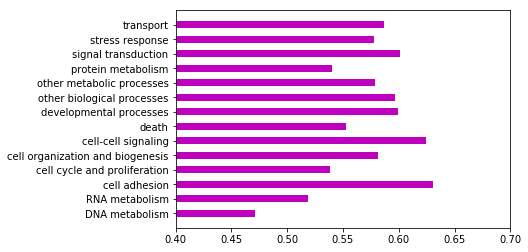

In [97]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.4, 0.7, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [98]:
#To plot density curve, must use CpG with original annotation
CpG = pd.read_table('ID_CpG.sorted', header=None)
CpG

,0,1
0,XM_022430339.1,0.538401
1,XM_022430340.1,0.619351
2,XM_022430341.1,0.599112
3,XM_022430342.1,0.615904
4,XM_022430343.1,0.960314
5,XM_022430344.1,0.538888
6,XM_022430345.1,0.296433
7,XM_022430346.1,0.272543
8,XM_022430347.1,0.790445
9,XM_022430348.1,0.356421


[-0.3, 1.7, 0, 1.7]

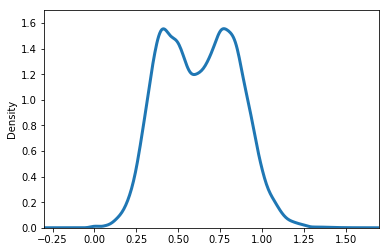

In [99]:
# pandas density plot
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

In [15]:
Ahya_diff = pd.read_table('Ahya_diff_cpg_GOslim')
Ahya_diff

,Column1,Column2,GOslim_bin
0,contig100302_114262_202031,NaN,NaN
1,contig100349,0.524223,RNA metabolism
2,contig100349,0.524223,stress response
3,contig100349,0.524223,other biological processes
4,contig100349,0.524223,other metabolic processes
5,contig102770,1.215500,RNA metabolism
6,contig102770,1.215500,transport
7,contig102770,1.215500,protein metabolism
8,contig102770,1.215500,cell cycle and proliferation
9,contig102770,1.215500,signal transduction


[0.7, 1.1, -1, 14]

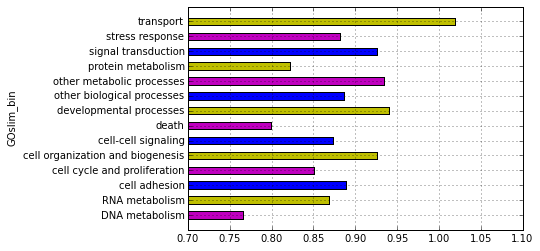

In [16]:
Ahya_diff.groupby("GOslim_bin")["Column2"].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.7, 1.1, -1, 14])

In [17]:
Ahya_diff2 = pd.read_table('Ahya_diff_cpg_anno', header=None)
Ahya_diff2

,0,1
0,contig100349,0.524223
1,contig103080_193887,0.661096
2,contig104395_153016,0.885662
3,contig105632_159216,2.265430
4,contig105949,0.973447
5,contig107034,0.727932
6,contig110172,0.729807
7,contig110751,1.080540
8,contig112007_150291_111307,1.037680
9,contig112463,0.627976


[-0.3, 1.7, 0, 1.7]

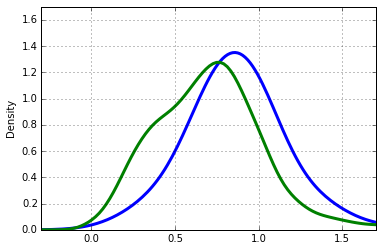

In [20]:
# pandas density plot
Ahya_diff2[1].dropna().plot(kind='kde', linewidth=3);
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

In [21]:
import numpy as np

In [22]:
np.mean(CpG)

1    0.736736
dtype: float64

In [23]:
np.mean(Ahya_diff2)

1    0.89944
dtype: float64